# **Часть 1: Общий пример на MNIST**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Преобразование изображений в векторы и нормализация
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

In [ ]:
# Создание модели
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8656 - loss: 0.4669 - val_accuracy: 0.9584 - val_loss: 0.1362
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9649 - loss: 0.1158 - val_accuracy: 0.9657 - val_loss: 0.1141
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9775 - loss: 0.0753 - val_accuracy: 0.9688 - val_loss: 0.1016
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9820 - loss: 0.0583 - val_accuracy: 0.9695 - val_loss: 0.1049
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0438 - val_accuracy: 0.9747 - val_loss: 0.0858
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9711 - val_loss: 0.0999
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9900 - loss: 0.0299 - val_accuracy: 0.9740 - val_loss: 0.0969
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9929 - loss: 0.022

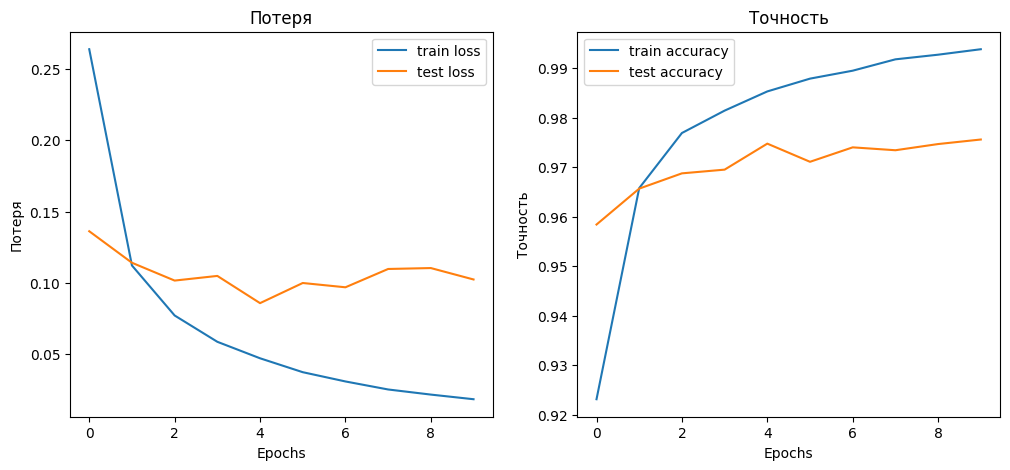

In [ ]:
# Графики потерь
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Потеря')
plt.xlabel('Epochs')
plt.ylabel('Потеря')
plt.legend()

# Графики точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Точность')
plt.xlabel('Epochs')
plt.ylabel('Точность')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


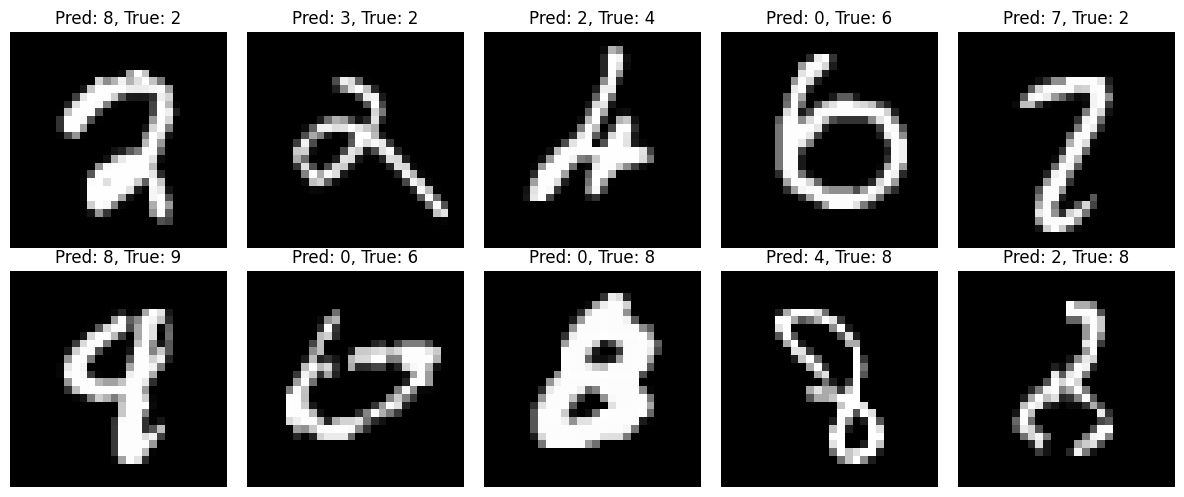

In [ ]:
# Предсказание классов на тестовой выборке
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Найдем неверно классифицированные примеры
incorrect_indices = np.where(predicted_classes != y_test)[0]

# Визуализация первых 10 неверно классифицированных изображений
plt.figure(figsize=(12, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predicted_classes[idx]}, True: {y_test[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# **Часть 2: Индивидуальные задания**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Загрузка данных Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Нормализация данных
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Преобразование данных из 3D в 2D (объединение высоты и ширины)
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Преобразование меток в категориальный формат
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [ ]:
# Создание модели без Dropout
model_no_dropout = keras.Sequential()
model_no_dropout.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
model_no_dropout.add(layers.Dense(128, activation='relu'))
model_no_dropout.add(layers.Dense(10, activation='softmax'))

# Компиляция модели
model_no_dropout.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Обучение модели без Dropout
epochs = 20
batch_size = 32
history_no_dropout = model_no_dropout.fit(X_train, y_train,
                                            epochs=epochs,
                                            batch_size=batch_size,
                                            validation_split=0.2)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7836 - loss: 0.6253 - val_accuracy: 0.8426 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8630 - loss: 0.3774 - val_accuracy: 0.8538 - val_loss: 0.4009
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8774 - loss: 0.3301 - val_accuracy: 0.8694 - val_loss: 0.3529
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8884 - loss: 0.2992 - val_accuracy: 0.8722 - val_loss: 0.3476
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8952 - loss: 0.2824 - val_accuracy: 0.8809 - val_loss: 0.3276
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8974 - loss: 0.2738 - val_accuracy: 0.8814 - val_loss: 0.3299
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9019 - loss: 0.2604 - val_accuracy: 0.8825 - val_loss: 0.3235
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9070 - loss: 0

In [ ]:
# Создание модели с Dropout
model_with_dropout = keras.Sequential()
model_with_dropout.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
model_with_dropout.add(layers.Dropout(0.5))  # Добавление Dropout
model_with_dropout.add(layers.Dense(128, activation='relu'))
model_with_dropout.add(layers.Dropout(0.5))  # Добавление Dropout
model_with_dropout.add(layers.Dense(10, activation='softmax'))

# Компиляция модели
model_with_dropout.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

# Обучение модели с Dropout
history_with_dropout = model_with_dropout.fit(X_train, y_train,
                                               epochs=epochs,
                                               batch_size=batch_size,
                                               validation_split=0.2)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6585 - loss: 0.9546 - val_accuracy: 0.8386 - val_loss: 0.4433
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8077 - loss: 0.5374 - val_accuracy: 0.8505 - val_loss: 0.4096
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8292 - loss: 0.4819 - val_accuracy: 0.8549 - val_loss: 0.3954
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8333 - loss: 0.4646 - val_accuracy: 0.8585 - val_loss: 0.3816
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8403 - loss: 0.4488 - val_accuracy: 0.8660 - val_loss: 0.3679
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8433 - loss: 0.4322 - val_accuracy: 0.8652 - val_loss: 0.3685
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8496 - loss: 0.4130 - val_accuracy: 0.8600 - val_loss: 0.3684
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8491 - loss: 0

In [ ]:
train_loss_no_dropout = history_no_dropout.history['loss'] # Train Loss (No Dropout)
val_loss_no_dropout = history_no_dropout.history['val_loss'] # Validation Loss (No Dropout)
train_accuracy_no_dropout = history_no_dropout.history['accuracy'] # Train Accuracy (No Dropout)
val_accuracy_no_dropout = history_no_dropout.history['val_accuracy'] # Validation Accuracy (No Dropout)

In [ ]:
train_loss_with_dropout = history_with_dropout.history['loss'] # Train Loss (With Dropout)
val_loss_with_dropout = history_with_dropout.history['val_loss'] # Validation Loss (With Dropout)
train_accuracy_with_dropout = history_with_dropout.history['accuracy'] # Train Accuracy (With Dropout)
val_accuracy_with_dropout = history_with_dropout.history['val_accuracy'] # Validation Accuracy (With Dropout)

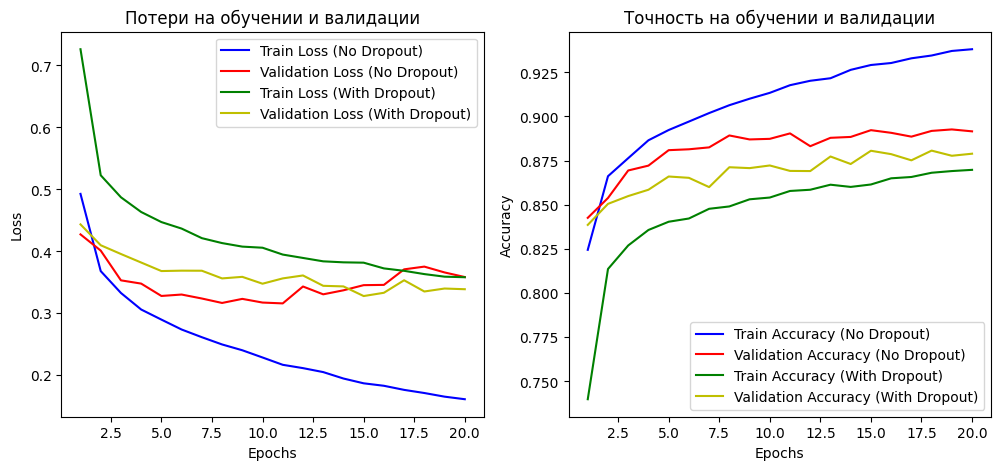

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_loss_no_dropout) + 1)
plt.figure(figsize=(12, 5))
# График потерь
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_no_dropout, 'b', label='Train Loss (No Dropout)')
plt.plot(epochs, val_loss_no_dropout, 'r', label='Validation Loss (No Dropout)')
plt.plot(epochs, train_loss_with_dropout, 'g', label='Train Loss (With Dropout)')
plt.plot(epochs, val_loss_with_dropout, 'y', label='Validation Loss (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Потери на обучении и валидации')
# График точности
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_no_dropout, 'b', label='Train Accuracy (No Dropout)')
plt.plot(epochs, val_accuracy_no_dropout, 'r', label='Validation Accuracy (No Dropout)')
plt.plot(epochs, train_accuracy_with_dropout, 'g', label='Train Accuracy (With Dropout)')
plt.plot(epochs, val_accuracy_with_dropout, 'y', label='Validation Accuracy (With Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Точность на обучении и валидации')
plt.show()

# **Часть 3: Сравнительный анализ и защита**

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh']
histories = {}
models = {}

for activation in activation_functions:
    model = keras.Sequential()
    model.add(layers.Dense(256, activation=activation, input_shape=(28 * 28,)))
    model.add(layers.Dense(128, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=0)

    histories[activation] = history
    models[activation] = model


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

for activation in activation_functions:
    y_pred = models[activation].predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    accuracy = np.mean(y_pred_classes == y_true_classes)
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

    print(f'Activation: {activation}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'F1 Score: {f1:.4f}\n')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Activation: relu
Accuracy: 0.8851
F1 Score: 0.8843

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Activation: sigmoid
Accuracy: 0.8860
F1 Score: 0.8846

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Activation: tanh
Accuracy: 0.8854
F1 Score: 0.8859



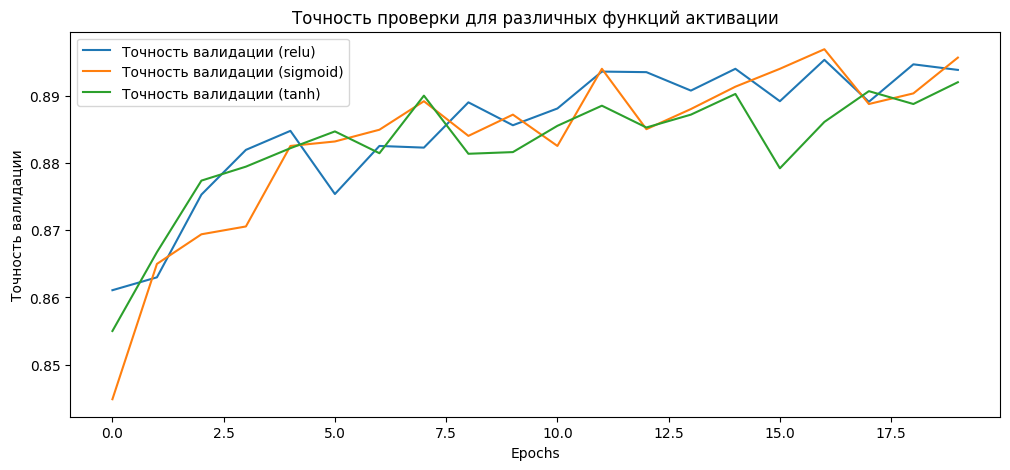

In [ ]:
plt.figure(figsize=(12, 5))

for activation in activation_functions:
    plt.plot(histories[activation].history['val_accuracy'], label=f'Точность валидации ({activation})')

plt.title('Точность проверки для различных функций активации')
plt.xlabel('Epochs')
plt.ylabel('Точность валидации')
plt.legend()
plt.show()